In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#load the dataset

dataset = "data_all_res copy.xlsx"
df = pd.read_excel(dataset)

print(df.shape)
print(df.columns)
df.head()

(8760, 23)
Index(['Time', 'year', 'moy_date', 'doy_date', 'busday', 'season', 'dow_date',
       'hour', 'month_name', 'temp', 'humid', 'r1', 'r2', 'r3', 'r4', 'r5',
       'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12'],
      dtype='object')


,Time,year,moy_date,doy_date,busday,season,dow_date,hour,month_name,temp,...,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12
0,2017-01-01 00:00:00,2017,1,1,False,Winter,1,0,January,22.0,...,0.0821,0.0667,0.2131,0.0854,0.1277,0.2173,0.1478,0.1568,1.1462,0.2553
1,2017-01-01 01:00:00,2017,1,1,False,Winter,1,1,January,22.0,...,0.0989,0.1047,0.1719,0.0948,0.1112,0.2411,0.1597,0.4315,0.2193,0.5326
2,2017-01-01 02:00:00,2017,1,1,False,Winter,1,2,January,22.0,...,0.0990,0.1001,0.1865,0.0978,0.1850,0.8316,0.2118,1.4843,0.1563,0.3818
3,2017-01-01 03:00:00,2017,1,1,False,Winter,1,3,January,23.5,...,0.1038,0.1354,0.1882,0.1064,0.0970,0.6645,0.2361,1.3716,0.2327,0.3798
4,2017-01-01 04:00:00,2017,1,1,False,Winter,1,4,January,27.0,...,0.0780,0.3508,0.2092,0.2456,0.1374,1.9451,0.3902,0.2105,0.2395,0.5176


In [45]:


# Convert 'Time' to datetime format using pandas inference
df['Time'] = pd.to_datetime(df['Time'])

# Set Time as index for easier resampling/plotting
df.set_index('Time', inplace=True)


In [46]:
df.head()

,year,moy_date,doy_date,busday,season,dow_date,hour,month_name,temp,humid,...,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12
Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017,1,1,False,Winter,1,0,January,22.0,71.010,...,0.0821,0.0667,0.2131,0.0854,0.1277,0.2173,0.1478,0.1568,1.1462,0.2553
2017-01-01 01:00:00,2017,1,1,False,Winter,1,1,January,22.0,71.010,...,0.0989,0.1047,0.1719,0.0948,0.1112,0.2411,0.1597,0.4315,0.2193,0.5326
2017-01-01 02:00:00,2017,1,1,False,Winter,1,2,January,22.0,68.750,...,0.0990,0.1001,0.1865,0.0978,0.1850,0.8316,0.2118,1.4843,0.1563,0.3818
2017-01-01 03:00:00,2017,1,1,False,Winter,1,3,January,23.5,58.895,...,0.1038,0.1354,0.1882,0.1064,0.0970,0.6645,0.2361,1.3716,0.2327,0.3798
2017-01-01 04:00:00,2017,1,1,False,Winter,1,4,January,27.0,44.800,...,0.0780,0.3508,0.2092,0.2456,0.1374,1.9451,0.3902,0.2105,0.2395,0.5176


In [47]:
meter_cols = [col for col in df.columns if col.startswith('r')] 

### Seasonal variation in electricity Consumption

<Figure size 1200x600 with 0 Axes>

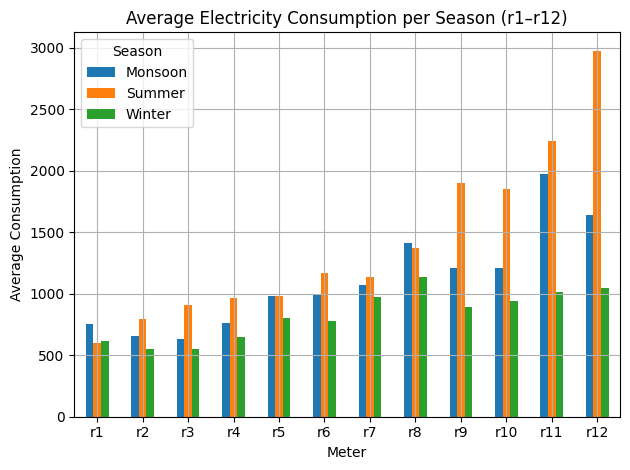

In [ ]:
# Seasonal Variation

%matplotlib inline

meter_cols = [col for col in df.columns if col.startswith('r')] # used in every variation

seasonal_avg = df.groupby('season')[meter_cols].sum()

plt.figure(figsize=(12, 6))
seasonal_avg.T.plot(kind='bar')
plt.title('Total Electricity Consumption per Season (r1–r12)')
plt.xlabel('Meter')
plt.ylabel('Average Consumption')
plt.xticks(rotation=0)
plt.legend(title='Season')
plt.grid(True)
plt.tight_layout()
plt.show()


### Seasonal Variation in Electricity Consumption with Temperature and Humidity

C:\Users\rajya\AppData\Local\Temp\ipykernel_25424\3949689454.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.annotate(f'{avg_consumption[i]:.2f}',
C:\Users\rajya\AppData\Local\Temp\ipykernel_25424\3949689454.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (season, avg_consumption[i]),
C:\Users\rajya\AppData\Local\Temp\ipykernel_25424\3949689454.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.annotate(f'{season

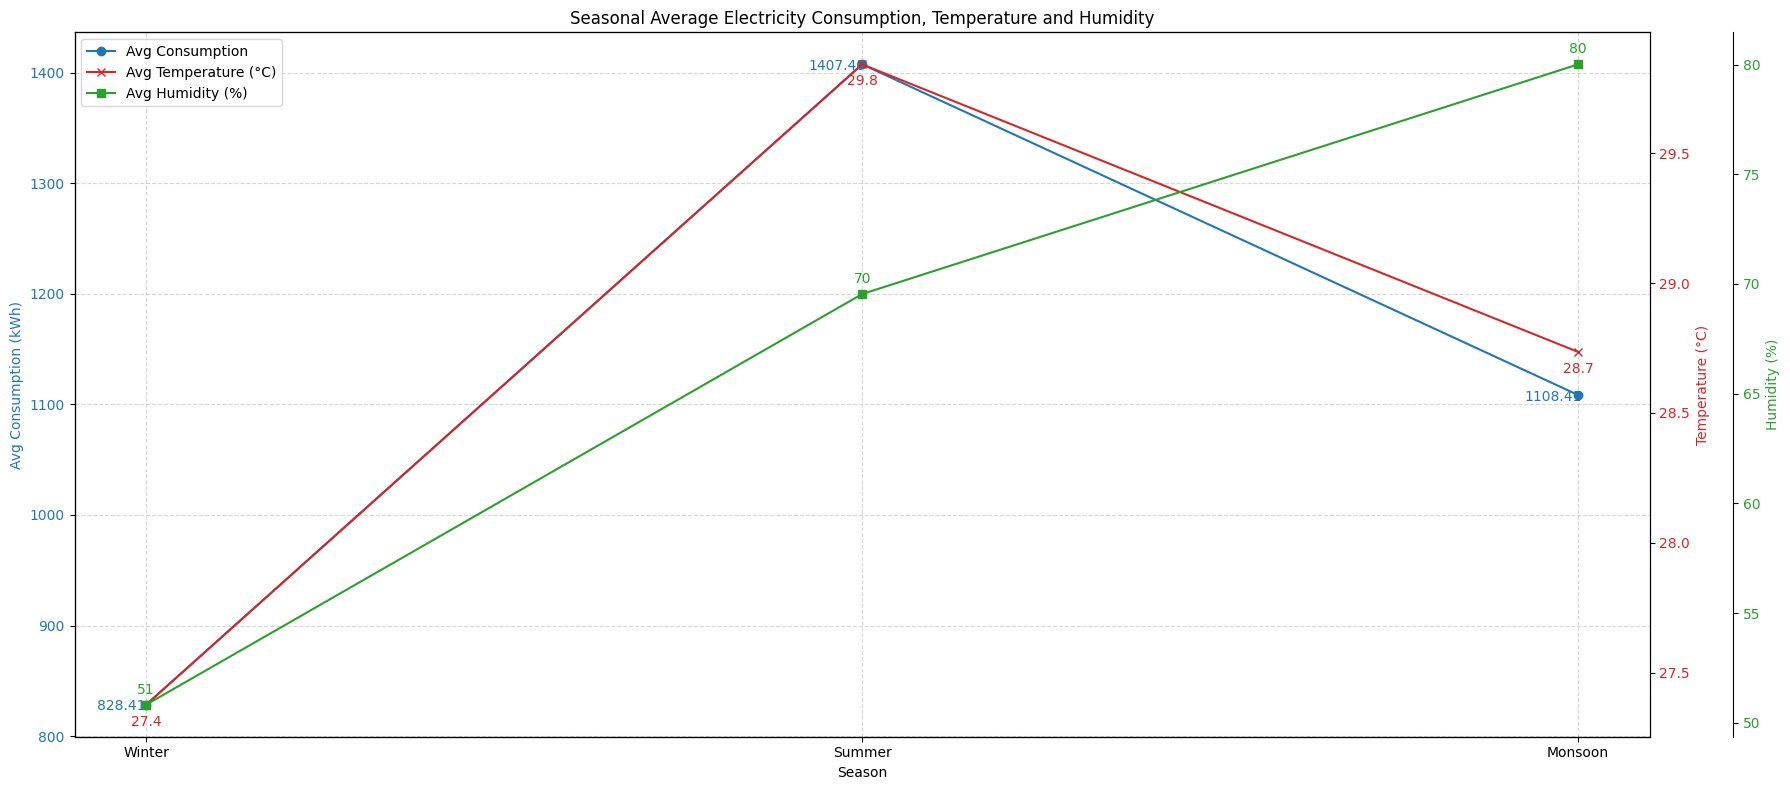

In [62]:
seasonal_avg_consumption = df.groupby('season')[meter_cols].sum()
seasonal_temp = df.groupby('season')['temp'].mean()
seasonal_humid = df.groupby('season')['humid'].mean()

season_order = ['Winter', 'Summer', 'Monsoon']
seasonal_avg_consumption = seasonal_avg_consumption.reindex(season_order)
seasonal_temp = seasonal_temp.reindex(season_order)
seasonal_humid = seasonal_humid.reindex(season_order)

fig, ax1 = plt.subplots(figsize=(18, 8))

avg_consumption = seasonal_avg_consumption.mean(axis=1)
ax1.plot(season_order, avg_consumption, color='tab:blue', marker='o', label='Avg Consumption')
ax1.set_xlabel('Season')
ax1.set_ylabel('Avg Consumption (kWh)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.5)

# Second y-axis for temperature
ax2 = ax1.twinx()
ax2.plot(season_order, seasonal_temp.values, color='tab:red', marker='x', label='Avg Temperature (°C)')
ax2.set_ylabel('Temperature (°C)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Third y-axis for humidity
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(season_order, seasonal_humid.values, color='tab:green', marker='s', label='Avg Humidity (%)')
ax3.set_ylabel('Humidity (%)', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

plt.title('Seasonal Average Electricity Consumption, Temperature and Humidity')
fig.tight_layout()

lines, labels = [], []
for ax in [ax1, ax2, ax3]:
    line, label = ax.get_legend_handles_labels()
    lines += line
    labels += label
plt.legend(lines, labels, loc='upper left')


for i, season in enumerate(seasonal_avg_consumption.index):
    ax1.annotate(f'{avg_consumption[i]:.2f}', 
                 (season, avg_consumption[i]), 
                 textcoords="offset points", 
                 xytext=(-18, -4), ha='center', 
                 color='tab:blue', fontsize=10)

    ax2.annotate(f'{seasonal_temp[i]:.1f}', 
                 (season, seasonal_temp[i]), 
                 textcoords="offset points", 
                 xytext=(0, -15), ha='center', 
                 color='tab:red', fontsize=10)

    ax3.annotate(f'{seasonal_humid[i]:.0f}', 
                 (season, seasonal_humid[i]), 
                 textcoords="offset points", 
                 xytext=(0, 8), ha='center', 
                 color='tab:green', fontsize=10)


plt.show()


### Monthly electricity Consumption

C:\Users\rajya\AppData\Local\Temp\ipykernel_25424\2221545212.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_total = df.groupby('month_name')[meter_cols].sum()


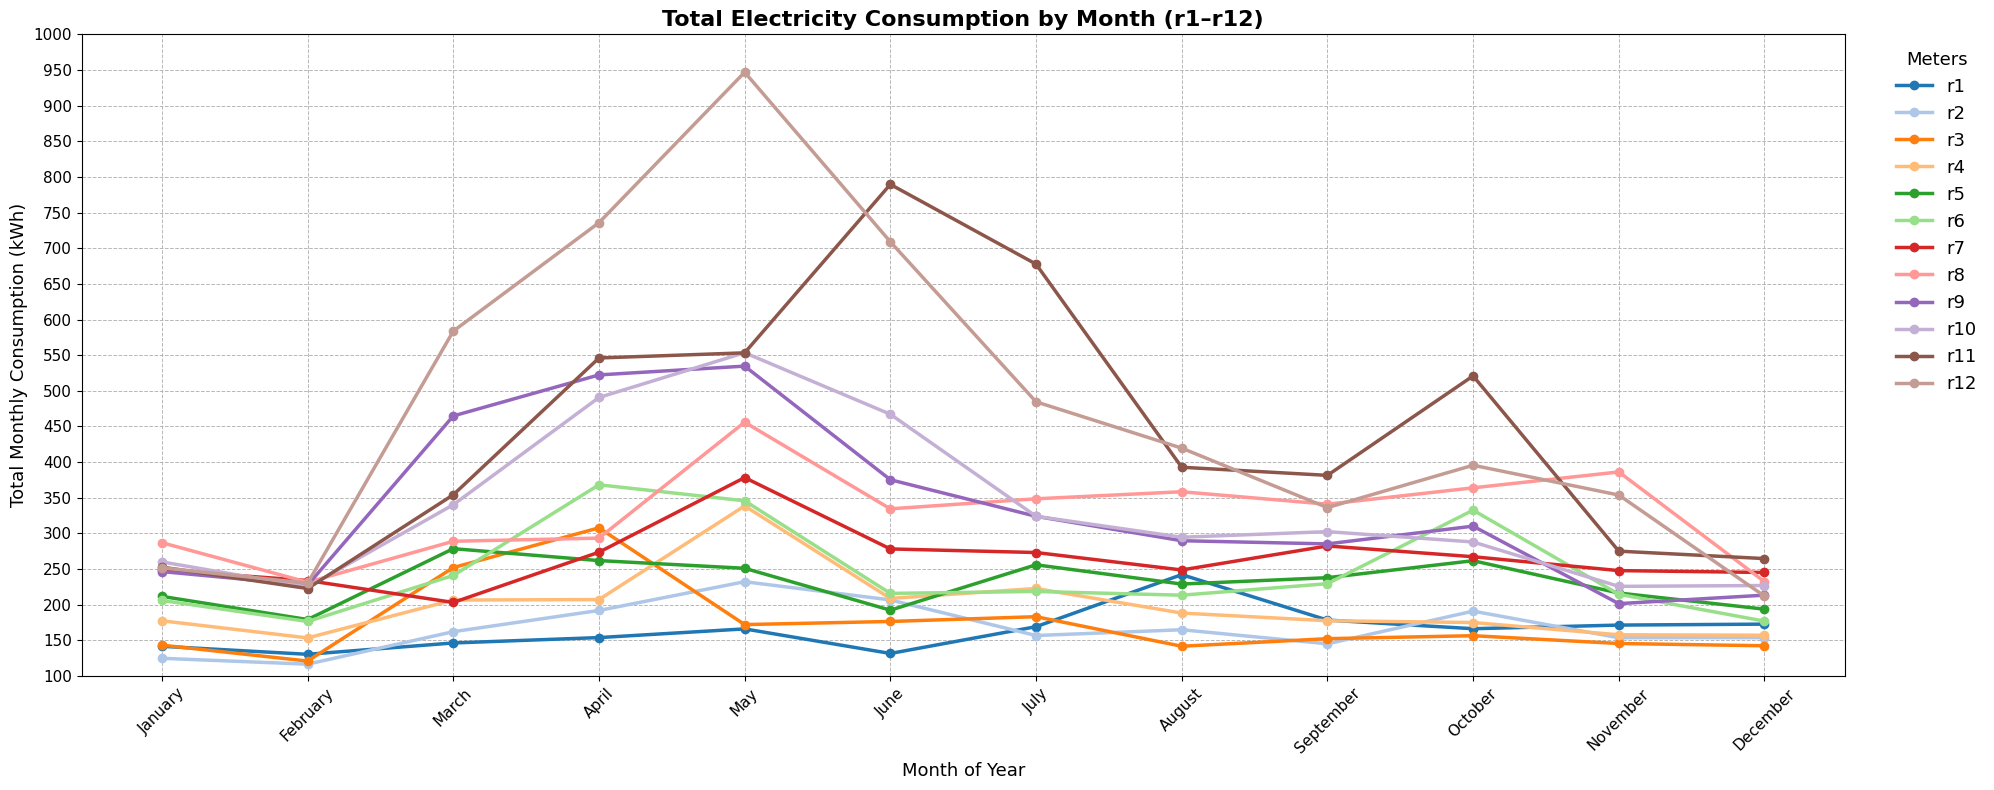

In [50]:
from matplotlib.ticker import MultipleLocator

from matplotlib.ticker import MultipleLocator

ax.set_ylim(100, 1000)
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(10))

# Grid lines
ax.yaxis.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
ax.yaxis.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)


import calendar
# Step 1: Add proper month name column
df['month_name'] = df['moy_date'].apply(lambda x: calendar.month_name[int(x)] if pd.notna(x) else None)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Step 2: Get list of meter columns
meter_cols = [col for col in df.columns if col.startswith('r')]

# Step 3: Sum consumption per meter for each month
monthly_total = df.groupby('month_name')[meter_cols].sum()

# Step 4: Plot the line chart
plt.figure(figsize=(20, 8))
palette = sns.color_palette("tab20", 12)

ax = monthly_total.plot(kind='line', marker='o', linewidth=2.5, markersize=6, color=palette, ax=plt.gca())

plt.title('Total Electricity Consumption by Month (r1–r12)', fontsize=16, fontweight='bold')
plt.xlabel('Month of Year', fontsize=13)
plt.ylabel('Total Monthly Consumption (kWh)', fontsize=13)

ax.set_xticks(range(12))
ax.set_xticklabels(monthly_total.index.tolist(), rotation=45, fontsize=11)

plt.yticks(fontsize=11)
ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.9)


plt.legend(title='Meters', title_fontsize=13, fontsize=13, bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
ax.set_ylim(100, 1000)  # Set Y-axis limits
ax.set_yticks(range(100, 1001, 50))  # Y-ticks from 100 to 1000, step 100

plt.tight_layout()
plt.show()


### Monthly electricity consumption with Temprature and Humidity

C:\Users\rajya\AppData\Local\Temp\ipykernel_25424\1345523582.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_consumption = df.groupby('month_name')[meter_cols].sum()
C:\Users\rajya\AppData\Local\Temp\ipykernel_25424\1345523582.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_temp = df.groupby('month_name')['temp'].mean()
C:\Users\rajya\AppData\Local\Temp\ipykernel_25424\1345523582.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

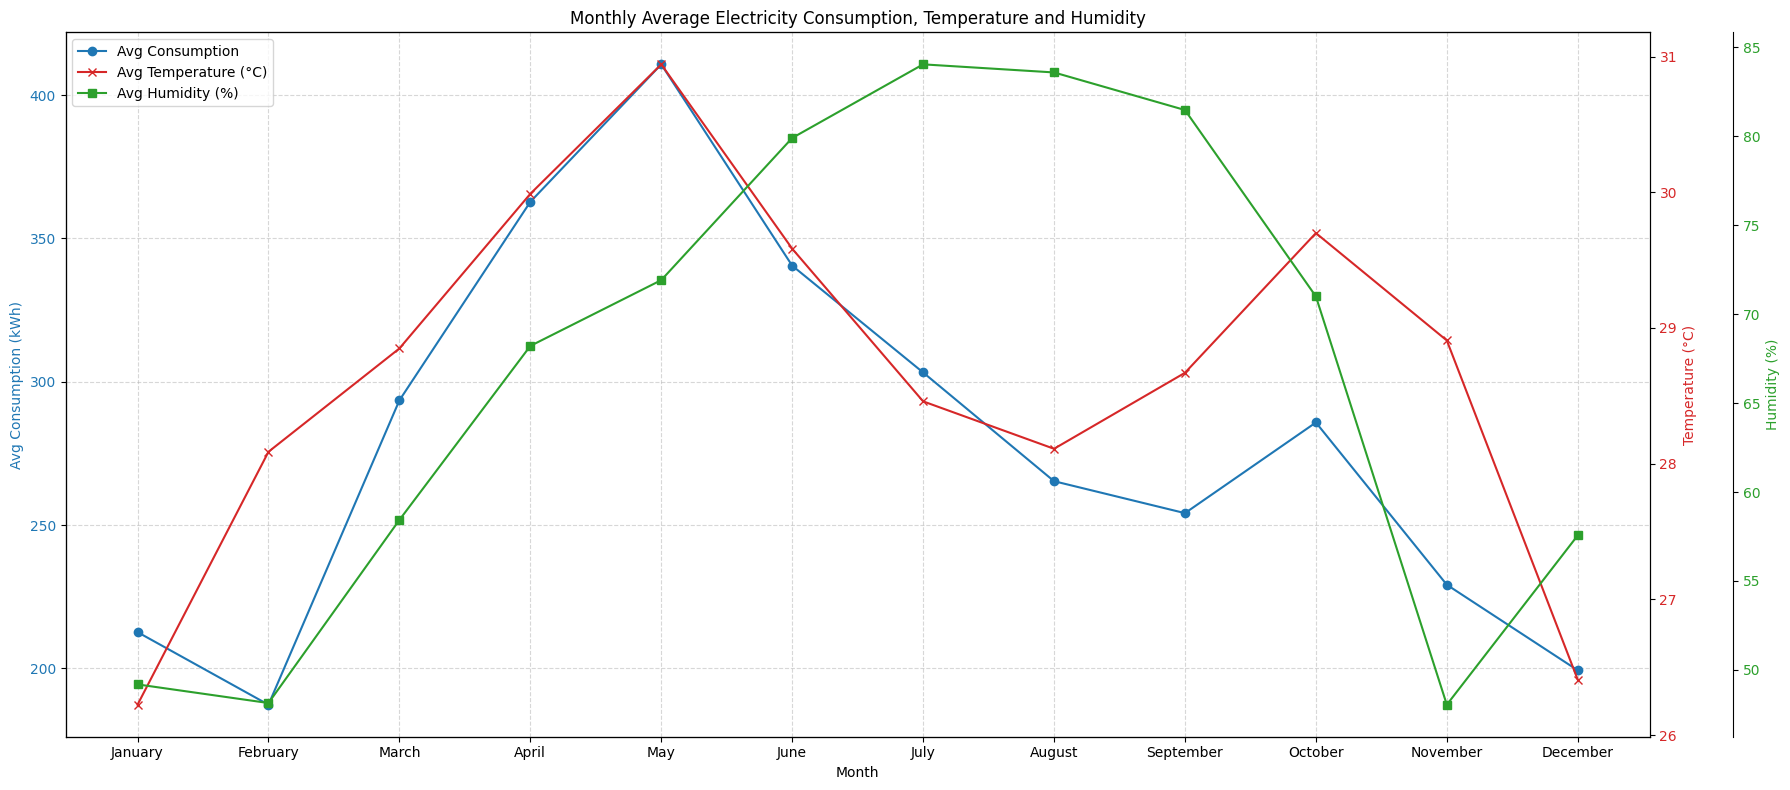

In [52]:
monthly_avg_consumption = df.groupby('month_name')[meter_cols].sum()

monthly_temp = df.groupby('month_name')['temp'].mean()
monthly_humid = df.groupby('month_name')['humid'].mean()

fig, ax1 = plt.subplots(figsize=(18, 8))

avg_consumption = monthly_avg_consumption.mean(axis=1) 
ax1.plot(monthly_avg_consumption.index, avg_consumption, color='tab:blue', marker='o', label='Avg Consumption')
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Consumption (kWh)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.5)

ax2 = ax1.twinx()
ax2.plot(monthly_temp.index, monthly_temp.values, color='tab:red', marker='x', label='Avg Temperature (°C)')
ax2.set_ylabel('Temperature (°C)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60)) 
ax3.plot(monthly_humid.index, monthly_humid.values, color='tab:green', marker='s', label='Avg Humidity (%)')
ax3.set_ylabel('Humidity (%)', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

plt.title('Monthly Average Electricity Consumption, Temperature and Humidity')
fig.tight_layout()

lines, labels = [], []
for ax in [ax1, ax2, ax3]:
    line, label = ax.get_legend_handles_labels()
    lines += line
    labels += label
plt.legend(lines, labels, loc='upper left')

plt.show()


### Electricity consumption according to Day of the week

<Figure size 3600x1200 with 0 Axes>

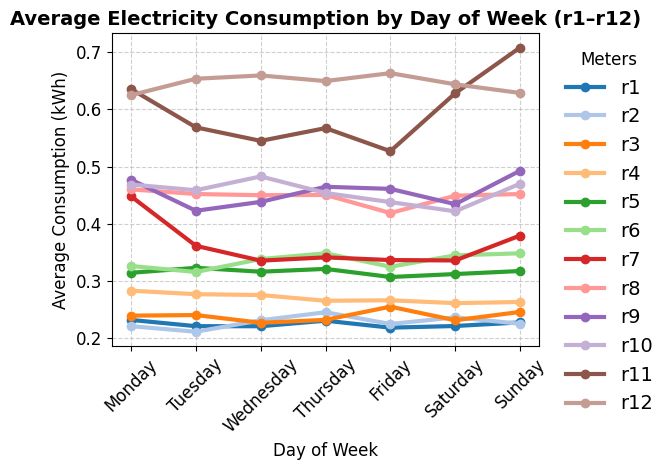

In [69]:
dow_avg = df.groupby('dow_date')[meter_cols].mean()

dow_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
           5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

dow_avg.index = dow_avg.index.map(dow_map)

plt.figure(figsize=(36, 12))

# using tab20 color palette for better visibility 
palette = sns.color_palette("tab20", 12)

dow_avg.plot(kind='line', marker='o', linewidth=3, markersize=6, color=palette)

plt.title('Average Electricity Consumption by Day of Week (r1–r12)', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Consumption (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Meters', title_fontsize=12, fontsize=14, bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()


### Electricity consumption according to Day of the week with temprature and electricity

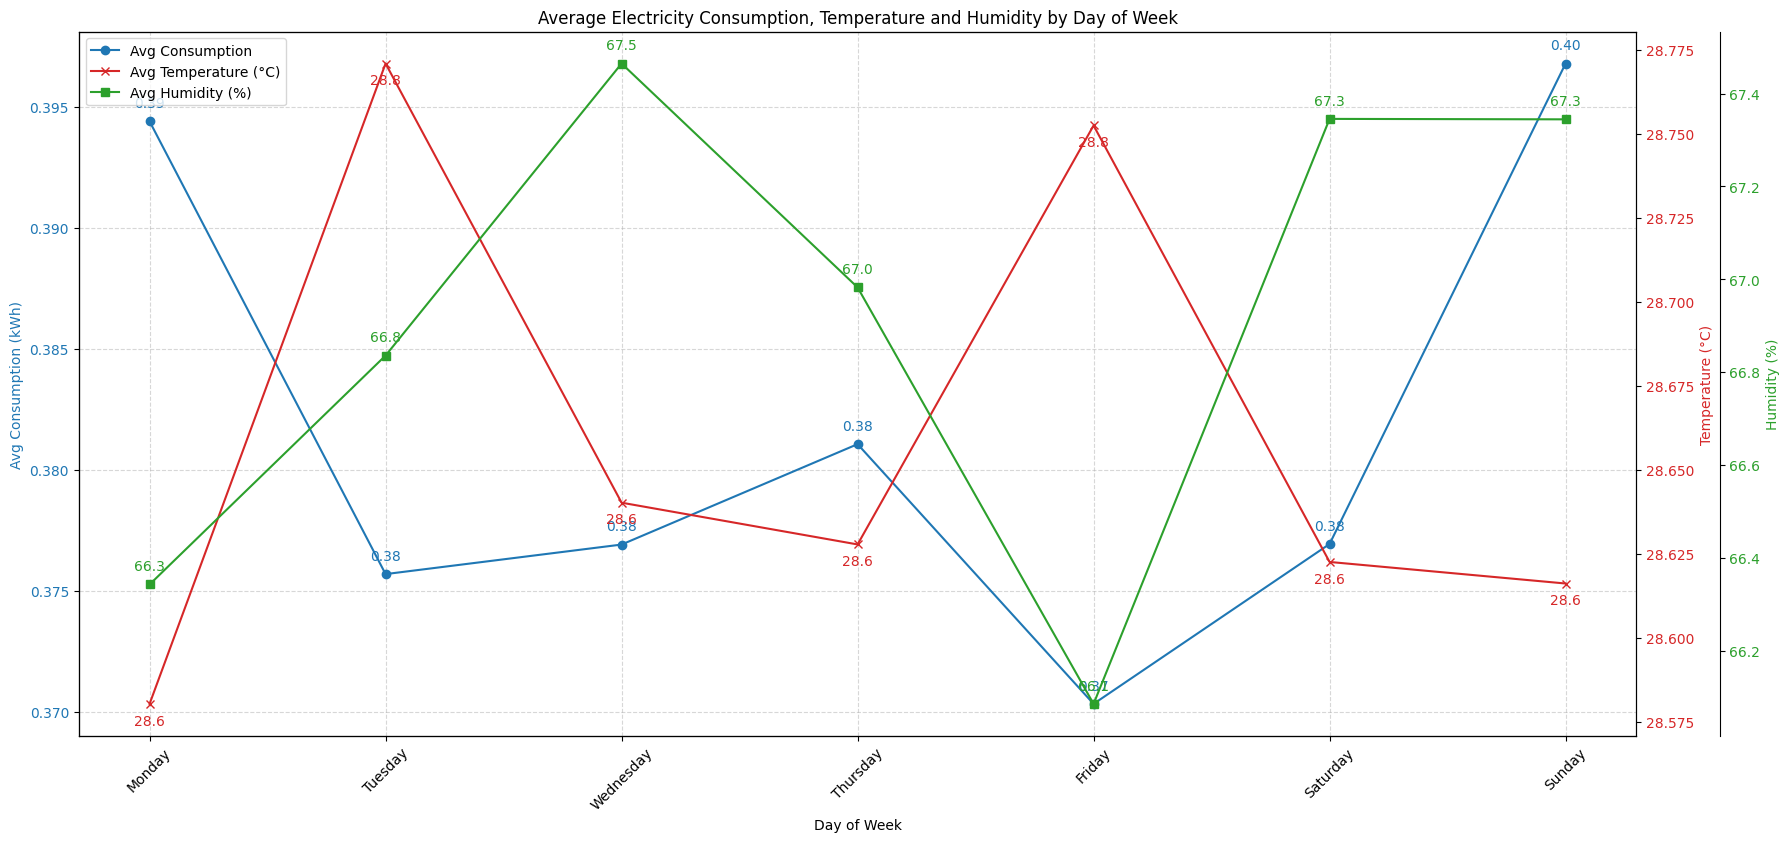

In [55]:
dow_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
           5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

dow_avg_consumption = df.groupby('dow_date')[meter_cols].mean()
dow_temp = df.groupby('dow_date')['temp'].mean()
dow_humid = df.groupby('dow_date')['humid'].mean()

dow_avg_consumption.index = dow_avg_consumption.index.map(dow_map)
dow_temp.index = dow_temp.index.map(dow_map)
dow_humid.index = dow_humid.index.map(dow_map)

avg_consumption = dow_avg_consumption.mean(axis=1)

fig, ax1 = plt.subplots(figsize=(18, 8))

ax1.plot(avg_consumption.index, avg_consumption.values, color='tab:blue', marker='o', label='Avg Consumption')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Avg Consumption (kWh)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.5)

for i, val in enumerate(avg_consumption.values):
    ax1.annotate(f'{val:.2f}', (i, val), textcoords="offset points", xytext=(0,10), ha='center', color='tab:blue')

ax2 = ax1.twinx()
ax2.plot(dow_temp.index, dow_temp.values, color='tab:red', marker='x', label='Avg Temperature (°C)')
ax2.set_ylabel('Temperature (°C)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

for i, val in enumerate(dow_temp.values):
    ax2.annotate(f'{val:.1f}', (i, val), textcoords="offset points", xytext=(0,-15), ha='center', color='tab:red')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(dow_humid.index, dow_humid.values, color='tab:green', marker='s', label='Avg Humidity (%)')
ax3.set_ylabel('Humidity (%)', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

for i, val in enumerate(dow_humid.values):
    ax3.annotate(f'{val:.1f}', (i, val), textcoords="offset points", xytext=(0,10), ha='center', color='tab:green')

plt.title('Average Electricity Consumption, Temperature and Humidity by Day of Week')
fig.tight_layout()

lines, labels = [], []
for ax in [ax1, ax2, ax3]:
    line, label = ax.get_legend_handles_labels()
    lines += line
    labels += label
plt.legend(lines, labels, loc='upper left')

ax1.set_xticks(range(len(avg_consumption.index)))
ax1.set_xticklabels(avg_consumption.index, rotation=45)

plt.show()


### Hourly consumptions

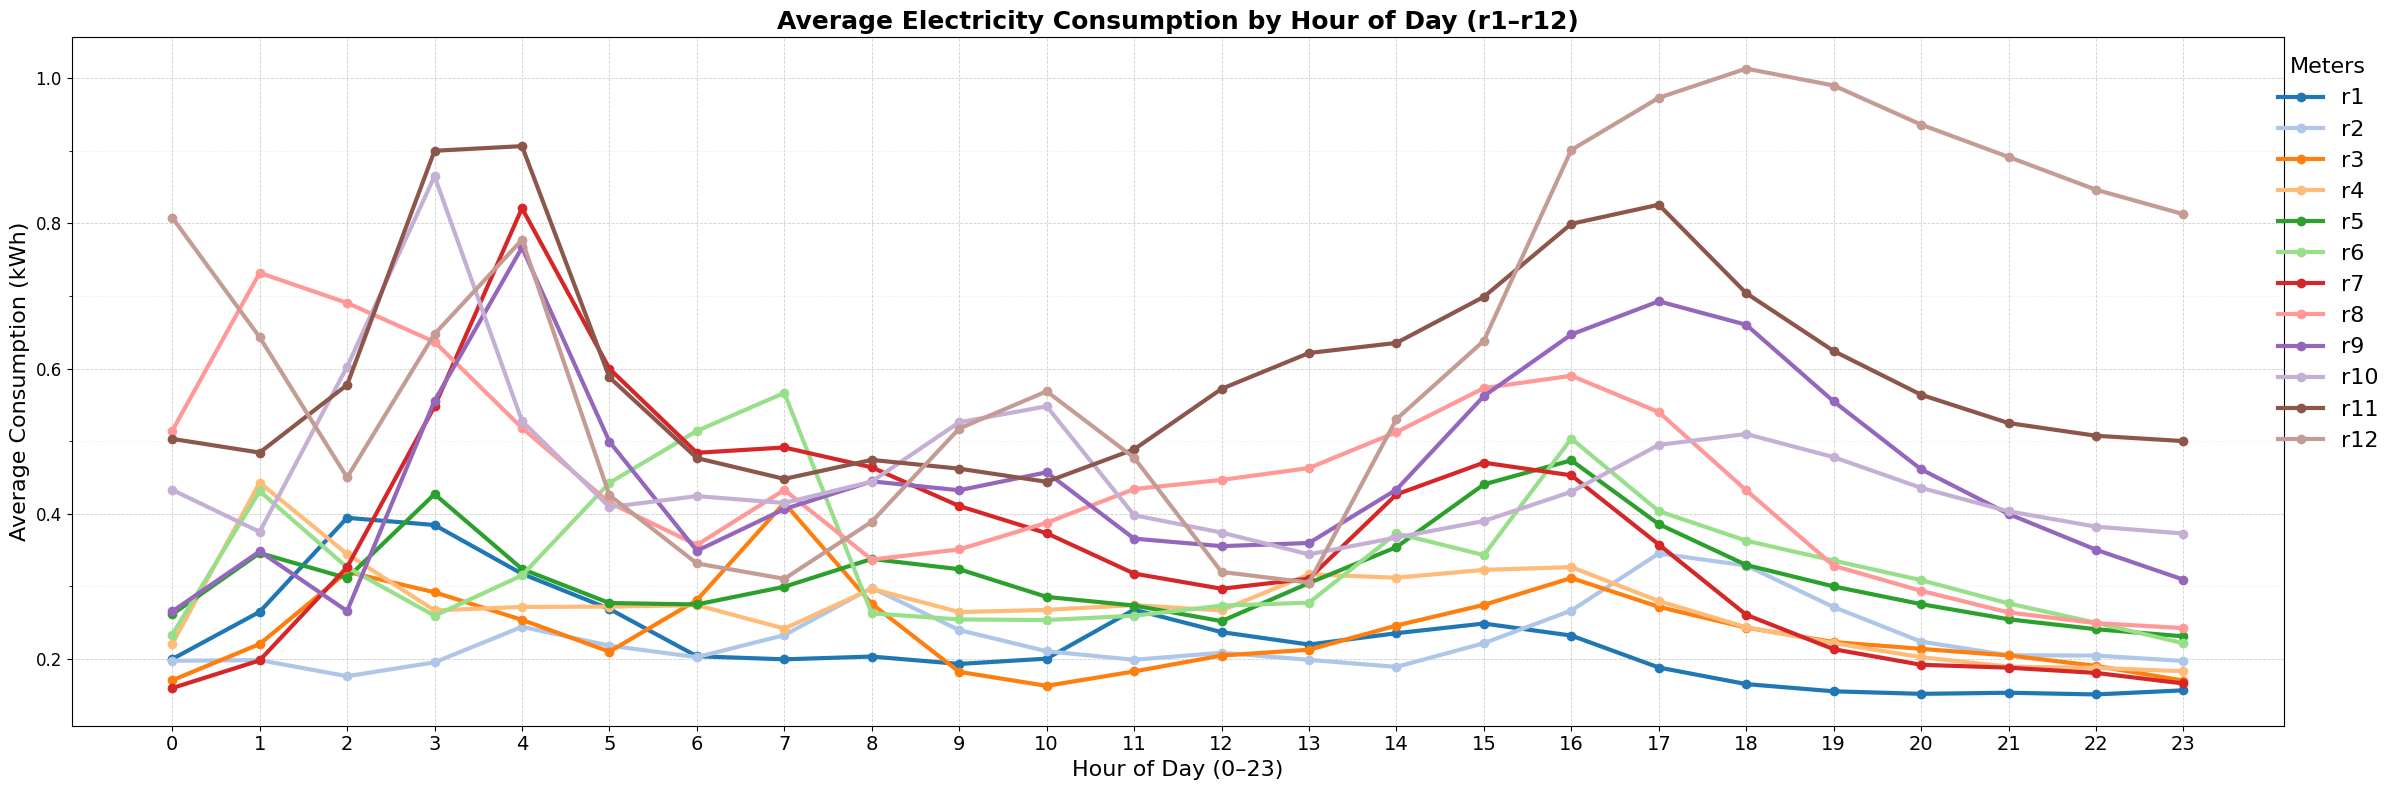

In [56]:
from matplotlib.ticker import MultipleLocator, FuncFormatter

hourly_avg = df.groupby('hour')[meter_cols].mean()

plt.figure(figsize=(24, 8))

palette = sns.color_palette("tab20", 12)

ax = hourly_avg.plot(kind='line', marker='o', linewidth=3, markersize=6, color=palette, ax=plt.gca())

plt.title('Average Electricity Consumption by Hour of Day (r1–r12)', fontsize=18, fontweight='bold')
plt.xlabel('Hour of Day (0–23)', fontsize=16)
plt.ylabel('Average Consumption (kWh)', fontsize=16)

#Y-axis ticks
ax.yaxis.set_major_locator(MultipleLocator(0.2))  # major ticks every 0.2
ax.yaxis.set_minor_locator(MultipleLocator(0.1))  # minor ticks every 0.1
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))

# x - axis ticks
ax.set_xticks(range(24))
ax.set_xticklabels([str(i) for i in range(24)], fontsize=14)

# Improve grid
ax.grid(which='major', linestyle='--', linewidth=0.6, alpha=0.6)
ax.grid(which='minor', linestyle=':', linewidth=0.4, alpha=0.4)

plt.yticks(fontsize=12)

plt.legend(title='Meters', title_fontsize=16, fontsize=16, bbox_to_anchor=(1.02, 1), loc='upper center', frameon=False)

plt.tight_layout()
plt.show()


### Hourly consumption with Temprature and Humidity

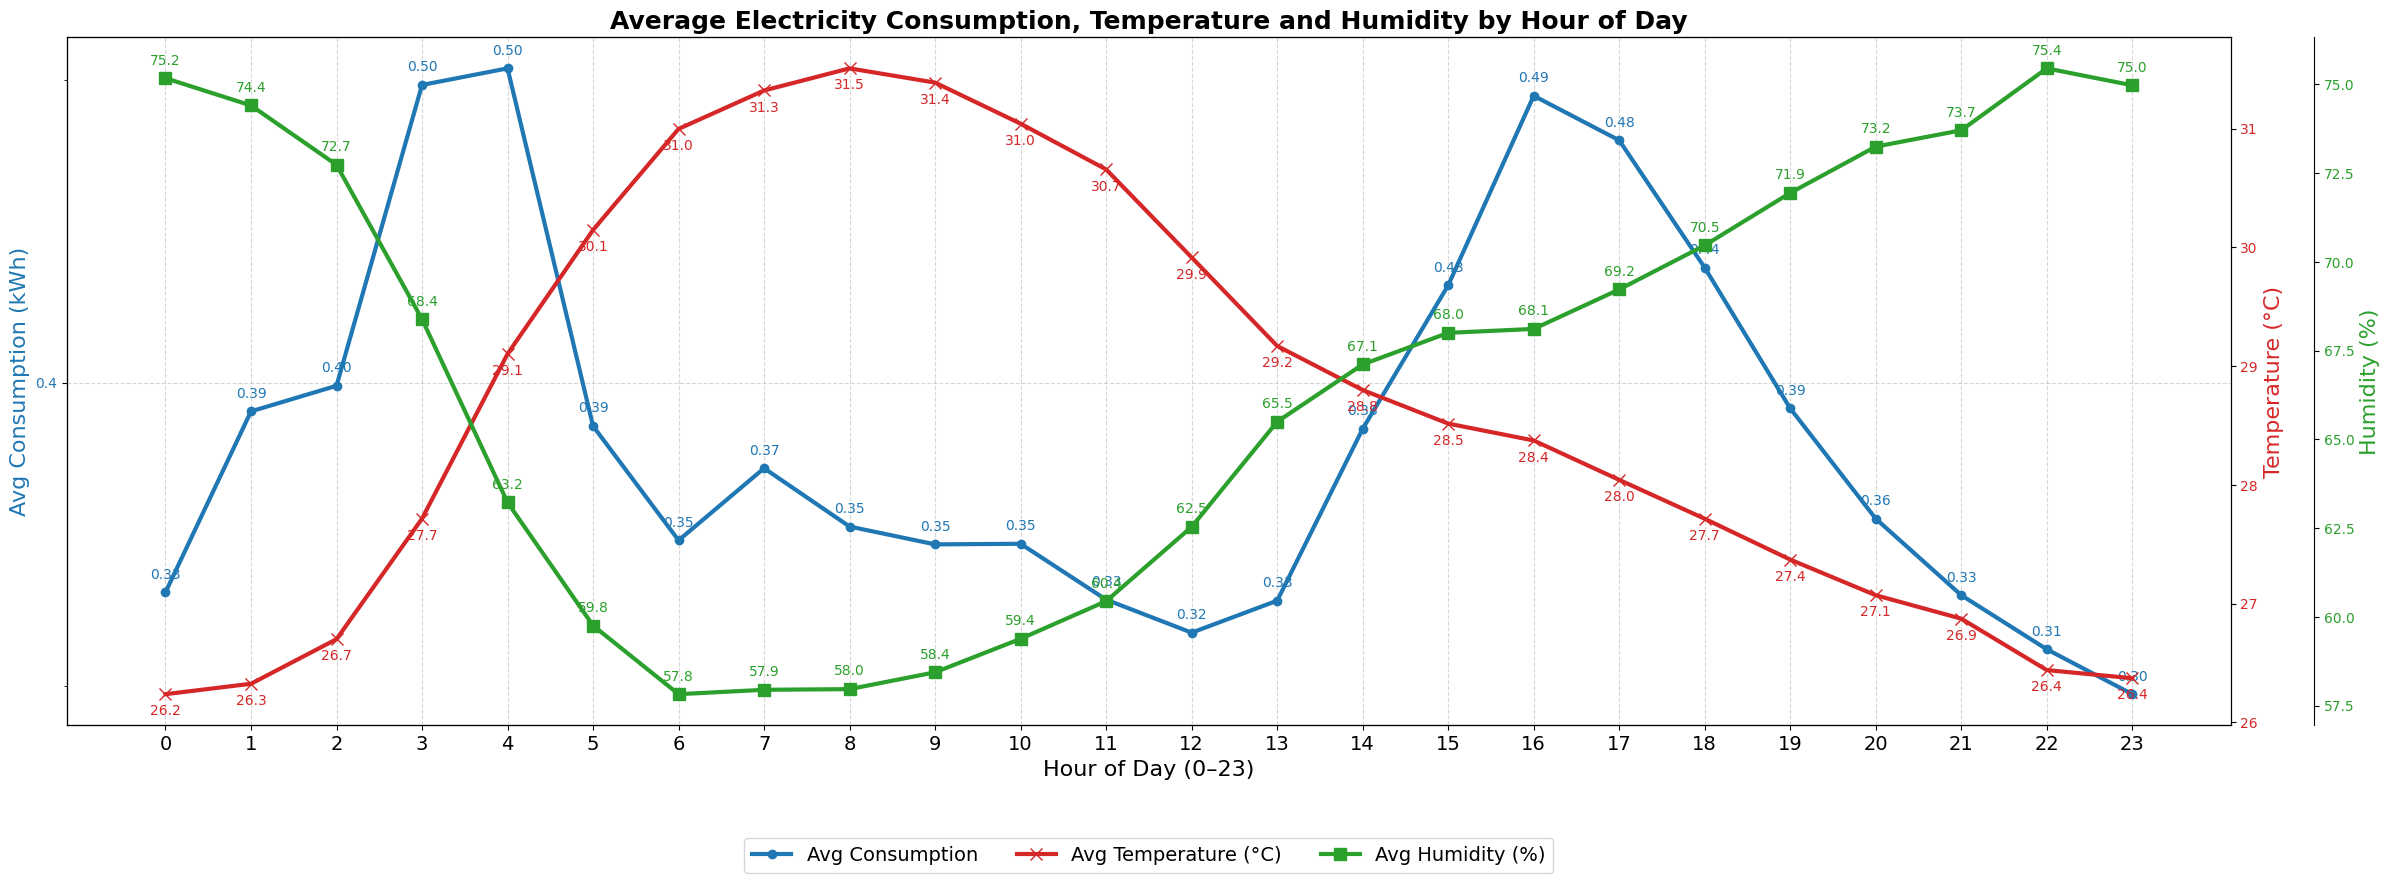

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FuncFormatter

hourly_avg_consumption = df.groupby('hour')[meter_cols].mean()
hourly_temp = df.groupby('hour')['temp'].mean()
hourly_humid = df.groupby('hour')['humid'].mean()

avg_consumption = hourly_avg_consumption.mean(axis=1)

fig, ax1 = plt.subplots(figsize=(24, 8))

ax1.plot(avg_consumption.index, avg_consumption.values, color='tab:blue', marker='o', linewidth=3, markersize=6, label='Avg Consumption')
ax1.set_xlabel('Hour of Day (0–23)', fontsize=16)
ax1.set_ylabel('Avg Consumption (kWh)', color='tab:blue', fontsize=16)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.5)

for i, val in enumerate(avg_consumption.values):
    ax1.annotate(f'{val:.2f}', (i, val), textcoords="offset points", xytext=(0,10), ha='center', color='tab:blue', fontsize=10)



ax1.set_xticks(range(24))
ax1.set_xticklabels([str(i) for i in range(24)], fontsize=14)


ax1.yaxis.set_major_locator(MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))


ax2 = ax1.twinx()
ax2.plot(hourly_temp.index, hourly_temp.values, color='tab:red', marker='x', linewidth=3, markersize=8, label='Avg Temperature (°C)')
ax2.set_ylabel('Temperature (°C)', color='tab:red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='tab:red')

for i, val in enumerate(hourly_temp.values):
    ax2.annotate(f'{val:.1f}', (i, val), textcoords="offset points", xytext=(0,-15), ha='center', color='tab:red', fontsize=10)


ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(hourly_humid.index, hourly_humid.values, color='tab:green', marker='s', linewidth=3, markersize=8, label='Avg Humidity (%)')
ax3.set_ylabel('Humidity (%)', color='tab:green', fontsize=16)
ax3.tick_params(axis='y', labelcolor='tab:green')

for i, val in enumerate(hourly_humid.values):
    ax3.annotate(f'{val:.1f}', (i, val), textcoords="offset points", xytext=(0,10), ha='center', color='tab:green', fontsize=10)

plt.title('Average Electricity Consumption, Temperature and Humidity by Hour of Day', fontsize=18, fontweight='bold')
fig.tight_layout()

lines, labels = [], []
for ax in [ax1, ax2, ax3]:
    line, label = ax.get_legend_handles_labels()
    lines += line
    labels += label
plt.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=14)

plt.show()


### temp and humid relation with consumption

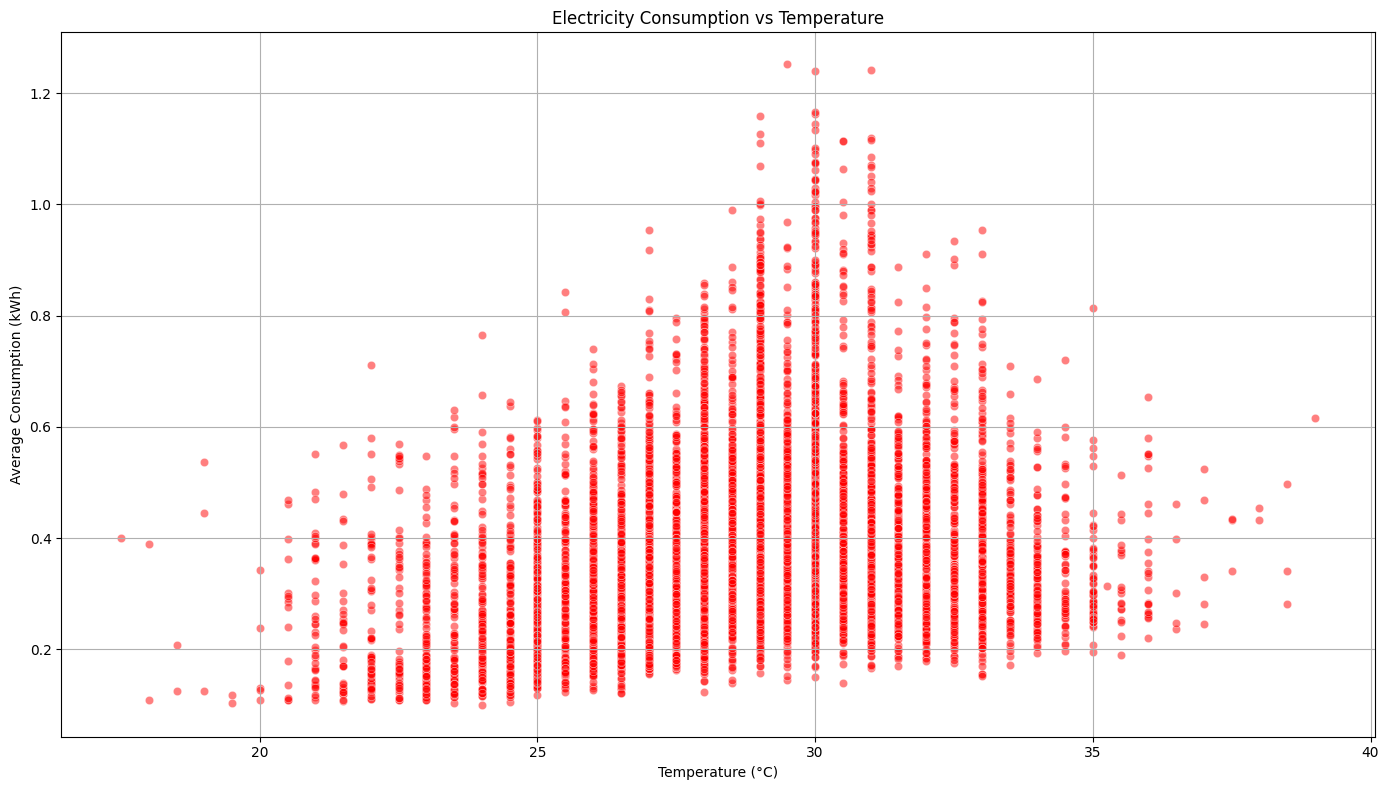

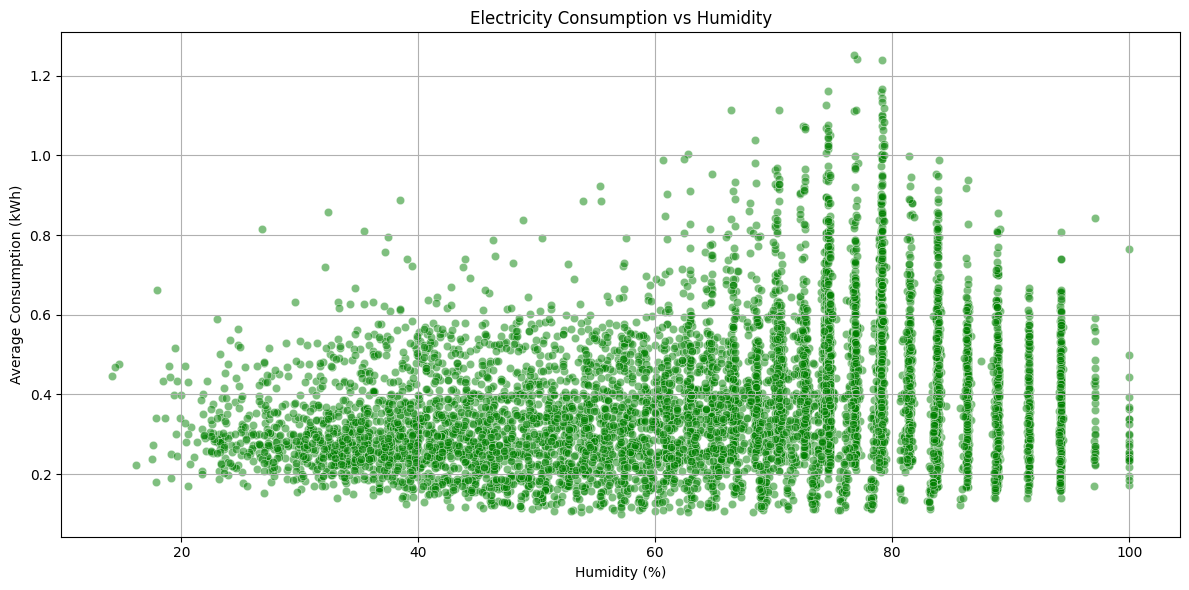

In [58]:
#tempp
df['avg_consumption'] = df[meter_cols].mean(axis=1)
plt.figure(figsize=(14, 8))
sns.scatterplot(x='temp', y='avg_consumption', data=df, alpha=0.5,color = "red")
plt.title('Electricity Consumption vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Average Consumption (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Humidity 
plt.figure(figsize=(12, 6))
sns.scatterplot(x='humid', y='avg_consumption', data=df, alpha=0.5,color = 'green')
plt.title('Electricity Consumption vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Average Consumption (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()
